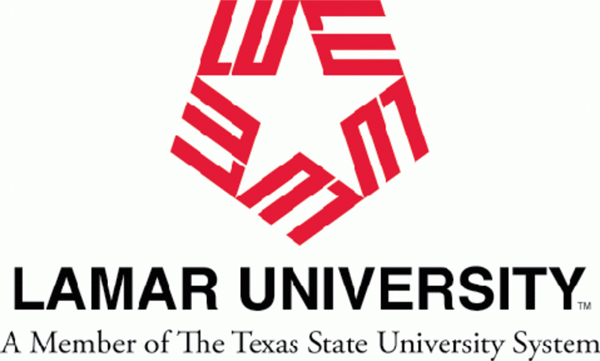

<table border="1" align="center">
	<tr style="background-color:#ADD8E6 ;">
		<td>
			<h1><font color='blue'><center>Impact of storage zones in main stream </center></font></h1>
		</td>
    </tr>
    <tr style="background-color:#ADD8E6 ;">
        <td>
		<h3><font color='brown'> <center> Vandan Gadhiya B </center> </font></h3>
        <h3><font color='brown'> <center> Saha Sontu </center> </font></h3>
        <h3><font color='brown'> <center> Ibironke Ademola </center> </font></h3>
		</td>
	</tr>    
    </table>

<h2><font color="magenta"> Overview </font> </h2>

<h5><font color="blue"> - Problem statement </font> </h5>
<h5><font color="blue"> - General Definitions </font> </h5>
<h5><font color="blue"> - Conceptual Model </font> </h5>
<h5><font color="blue"> - Model 1 - Main stream without storage zone </font> </h5>
<h5><font color="blue"> - Model 2 - Main stream with storage zone </font> </h5>
<h5><font color="blue"> - Concentration of BOD and DO in storage zone only </font> </h5>
<h5><font color="blue"> - Results plots</font> </h5>
<h5><font color="blue"> - Summary and Conclusion</font> </h5>

<h2><font color="magenta"> Problem Statement </font> </h2>

Numerically solve the dissolved oxygen model presented in Chapra and Runkel (1999). By using RK45. Then compare the results to the analytical solution presented in the paper and plot the results with our model.

Reference: Chapra, Steven & Runkel, Robert. (1999). Modeling Impact of Storage Zones on Stream Dissolved Oxygen. Journal of Environmental Engineering-asce - J ENVIRON ENG-ASCE. 125. 10.1061/(ASCE)0733-9372(1999)125:5(415).

<h2><font color="magenta"> Definitions </font> </h2>

Main Channel:
This is the part of the stream where water and the pollutant are mainly transported by advection (horizontal flow of fluid) or dispersion (wide spread at different speed). Chapra & Runklel (199) Pg. 415.

The storage zone: 
This is the area of stagnant pockets of water and porous streambeds. Chapra & Runklel (1999) Pg. 415.

Dissolved Oxygen (DO):
The amount of oxygen that is present in water. EPA - National Aquatic Resource Surveys.

Biochemical Oxygen Demand (BOD):
Generally represents how much disslved oxygen (DO) is needed to break down organic matter in water (https://www.usgs.gov/special-topics/water-science-school/science/biological-oxygen-demand-bod-and-water). Here it is used a measure of amount of pollutant in the stream.

<h2><font color="magenta"> Conceptual Model </font> </h2>

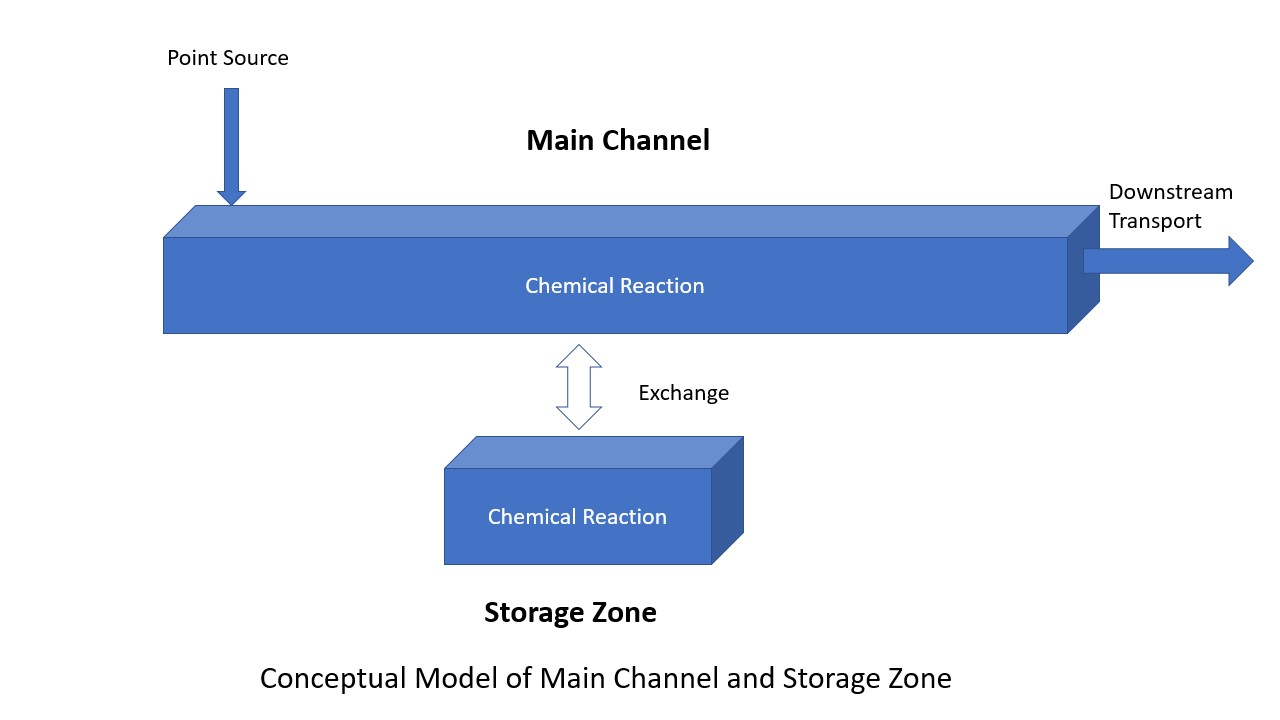

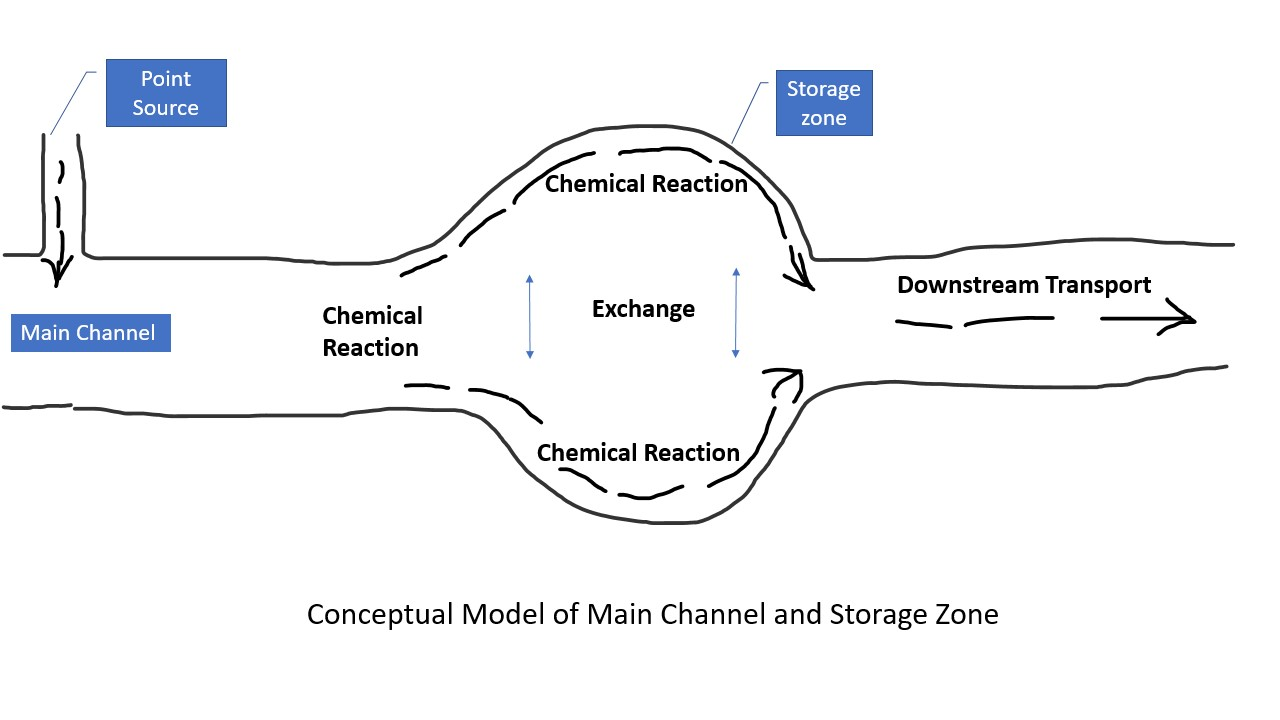

<h2><font color="magenta"> Assumptions </font> </h2>

1. The system’s hydrogeometry is constant.
2. The stream flow is dominated by advection. i.e it flows mostly horizontally.
3. The BOD is in soluble form; i.e., settling losses are asssumed to be negligible.
4. The temperature in the storage zone and the main channel are the same.
5. Plant activity and Sediment Oxygen Demand (SOD) are negligible.
6. Reaeration in the storage zone is negligible.

<h2><font color="magenta"> Governing Equations </font> </h2>

<div style="width:0; float:left;">
$$
L_{s} = \frac{\alpha\frac{A}{A_{s}}L}{\alpha \frac{A}{A_{s}}+K_{ds}}
$$
    
$$
\frac{\mathrm{d} L}{\mathrm{d} x} = \frac{-K_{d}L +\alpha (L_{s} -L)}{U}
$$
   
$$
D_{s} =D + \frac{K_{ds}L_{s}}{\alpha\frac{A}{A_{s}}}
$$
    
$$
\frac{\mathrm{d} D}{\mathrm{d} x} = \frac{K_{d}L-K_{a}D+\alpha (D_{s}-D)}{U}
$$
    </div>

where U = velocity (in/day) = Q/A, α is constant (day$^{-1}$) L = BOD concentration (mg/L), L$_{s}$ = BOD concentration  in  the  storage  zone  (mg/L), K$_{d}$ = BOD decomposition rate (per day), K$_{ds}$ = BOD decomposition rate in the storage zone (per day); D = DO deficit (mg/L), D$_{s}$ = DO deficit in the storage zone (mg/L) and K$_{a}$ = oxygen reaeration rate (per day) 

<h2><font color="magenta"> Initial Conditions </font> </h2>

L0 = 10 mg/L (BOD concentration at point source),


D0 = 0 mg/L (DO deficit at point source)

<h2><font color="magenta"> Code </font> </h2>

In [3]:
#Load Libraries
import numpy as np
from scipy.integrate import solve_ivp #Import solve_ivp function to solve ODEs
from matplotlib import pyplot as plt #Import pyplot for plotting

<h2><font color="magenta"> Input Parameters </font> </h2>

In [4]:
Al = 3.456 #d^-1
Kds = 3 #1/day
Kd = 3 #1/day
Ka = 10 #1/day
L0=10 #mg/L
D0=0 #mg/L
y0 = [L0,D0] #[L0=10mg/L,D0=0mg/L]
A = 0.4 #m^2
As = 0.7 #m^2
U = 2808 #m/day
xspan =(0,2000)
xx = np.arange(0,2100,100)
argsx = (Al,Kds,Kd,Ka,A,As,U)

<h2><font color="magenta"> Model 1 - Main stream without storage zone  </font> </h2>

In [5]:
#Function for solving ODEs without stroge zones
def ODES(x,y0,Al,Kds,Kd,Ka,A,As,U):
    L = y0[0]
    D = y0[1]
    dLdx = (-Kd*L)/U
    dDdx = (Kd*L-Ka*D)/U
    dcdx = (dLdx,dDdx)
    return dcdx

In [6]:
#Calling function into solve_ivp to solve Governing equaion for input parameters  
a = solve_ivp(ODES,t_span=xspan,y0=y0,method='RK45',t_eval=xx,args=argsx)

<h2><font color="magenta"> Results - Main stream without storage zone </font> </h2>

In [7]:
print(a.message)
print('Number of function Evaluation:',a.nfev)
print('Success:',a.success)

The solver successfully reached the end of the integration interval.
Number of function Evaluation: 68
Success: True


In [8]:
L = a['y'][0].tolist() #Convert Values of BOD into list as L

In [9]:
D = a['y'][1].tolist() #convert values of DO deficit into list as D

In [10]:
#Get value of oxygen
Ox = []
for j in range(len(D)):
    Os = 8 - D[j] #from the formula DO = Osat - Oxygen
    Ox.append(Os)

<h2><font color="magenta"> Model 2 - Main stream along with storage zone  </font> </h2>

In [11]:
#Function for solving ODEs along with stroge zones
def ODES_S(x,y0,Al,Kds,Kd,Ka,A,As,U):
      
    L = y0[0]
    D = y0[1]
    
    Ls = (Al*(A/As)*L)/(Al*(A/As)+Kds)  
    dLdx = ((-Kd*L)+Al*(Ls-L))/U
    Ds = D+((Kds*Ls)/(Al*(A/As)))
    dDdx = ((Kd*L-Ka*D)+(Al*(Ds-D)))/U
    dadx=(dLdx,dDdx)
    return dadx 

In [12]:
#Calling function into solve_ivp to solve Governing equaion for input parameters
p = solve_ivp(ODES_S,t_span=xspan,y0=y0,method='RK45',t_eval=xx,args=argsx)

<h2><font color="magenta"> Results - Main stream along with storage zone </font> </h2>

In [13]:
print(p.message)
print('Number of function Evaluation:',p.nfev)
print('Success:',p.success)

The solver successfully reached the end of the integration interval.
Number of function Evaluation: 68
Success: True


In [14]:
L_s = p['y'][0].tolist() #Convert Values of BOD into list as L_s

In [15]:
D_s = p['y'][1].tolist() #convert values of DO deficit into list as D_s

In [16]:
Ox_s = []
for b in range(len(D_s)):
    Os = 8 - D_s[b]
    Ox_s.append(Os)

In [17]:
x = p['t'].tolist() #Convert range of distance into list as x 

<h2><font color="magenta">Concentration of BOD and DO in storage zone only </font> </h2>

In [18]:
#BOD in storage zone
i = 0
Ls_lst =[] #Create a list to store the values of Ls 
for i in L_s:
    Ls = (Al*(A/As)*i)/(Al*(A/As)+Kds)
    Ls_lst.append(Ls) #Add the values of Ls to the list    

In [19]:
#DO in storage zone
Zip_object = zip(D_s,Ls_lst) #Create object using zip function to take values from 2 list
Ds_lst = [] #Create a list to store the values of Ds
p = 0
q = 0
for p,q in Zip_object:
    Ds = p+((Kds*q)/(Al*(A/As)))
    Ds_lst.append(Ds) #Add the values of Ds to the list Ds_var    

In [20]:
Ox_lst = []
for i in range(len(Ds_lst)):
    O = 8 - Ds_lst[i]
    Ox_lst.append(O)

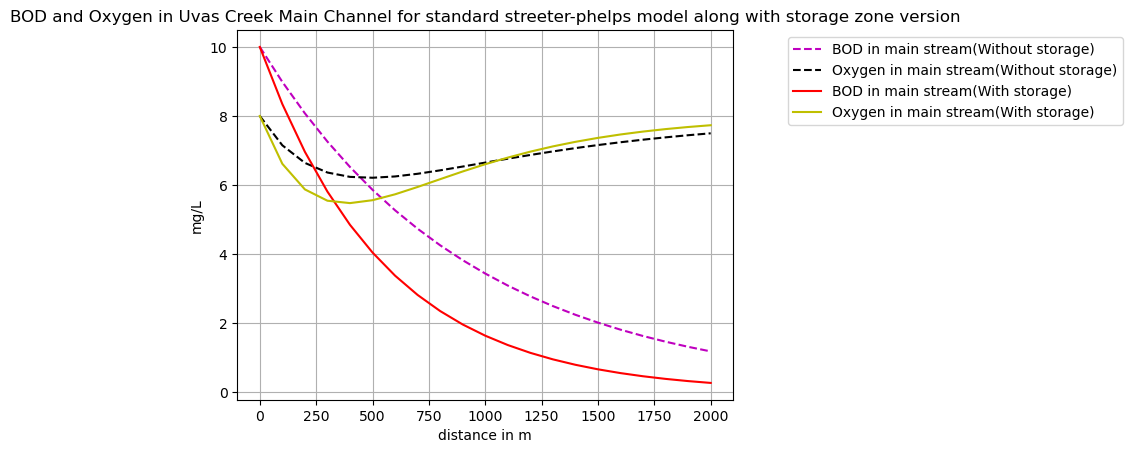

In [21]:
plt.plot(x,L,"m--",label='BOD in main stream(Without storage)')
plt.plot(x,Ox,"k--",label='Oxygen in main stream(Without storage)')
plt.plot(x,L_s,"r-",label='BOD in main stream(With storage)')
plt.plot(x,Ox_s,"y-",label='Oxygen in main stream(With storage)')
plt.title('BOD and Oxygen in Uvas Creek Main Channel for standard streeter-phelps model along with storage zone version')
plt.xlabel('distance in m')
plt.ylabel('mg/L')
plt.legend(bbox_to_anchor = (1.8,1), loc='best')         
plt.grid()

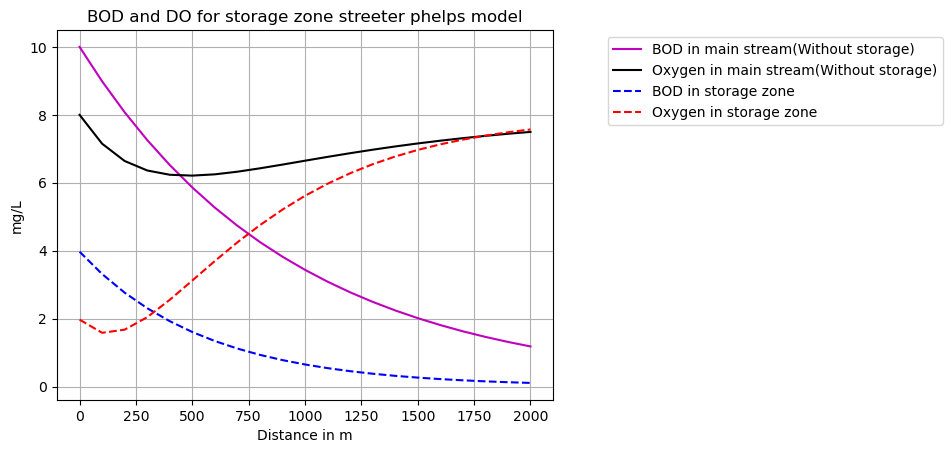

In [22]:
plt.plot(x,L,"m-",label='BOD in main stream(Without storage)')
plt.plot(x,Ox,"k-",label='Oxygen in main stream(Without storage)')
plt.plot(x,Ls_lst,"b--",label='BOD in storage zone')
plt.plot(x,Ox_lst,"r--",label='Oxygen in storage zone')
plt.title('BOD and DO for storage zone streeter phelps model')
plt.xlabel('Distance in m')
plt.ylabel('mg/L')
plt.legend(bbox_to_anchor = (1.8,1), loc='best')
plt.grid()
plt.show()

<h2><font color="magenta"> Summary and Conclusion </font> </h2>

This project shows results that are consistent with the paper (Chapra & Runkel (1999)) highlighting the impact of storage zones on the main channel of a stream. BOD decompostion rate was shown to be slower in the stream with storage zone compared to without storage zone model. DO decompostion rate was at saturation at point source, reduced over a quater of the span and started to approach saturation towards the farther distance. The storage zone reduced the velocity of the stream flow providing residence time for reaeration of the main stream.